<a href="https://colab.research.google.com/github/mafecala/compuvisual/blob/master/python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Figure size 1500x1000 with 0 Axes>

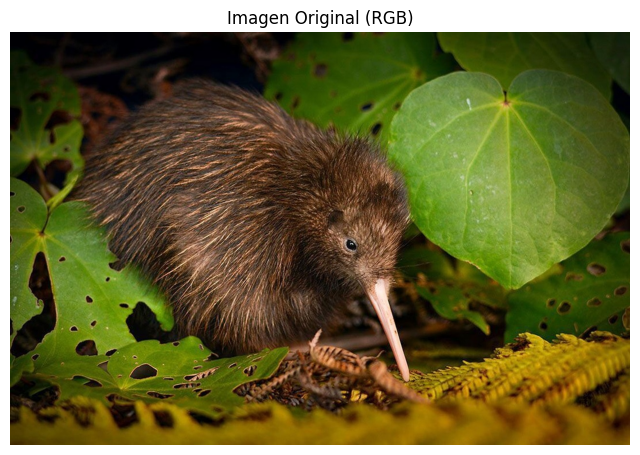

Dimensiones de la imagen: (853, 1280, 3)


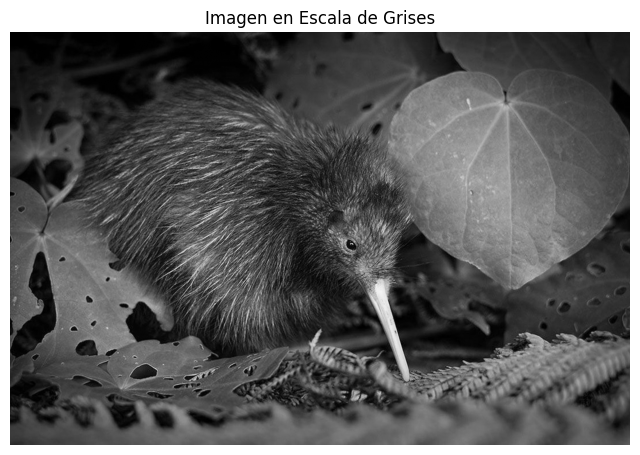

Dimensiones de la imagen en escala de grises: (853, 1280)


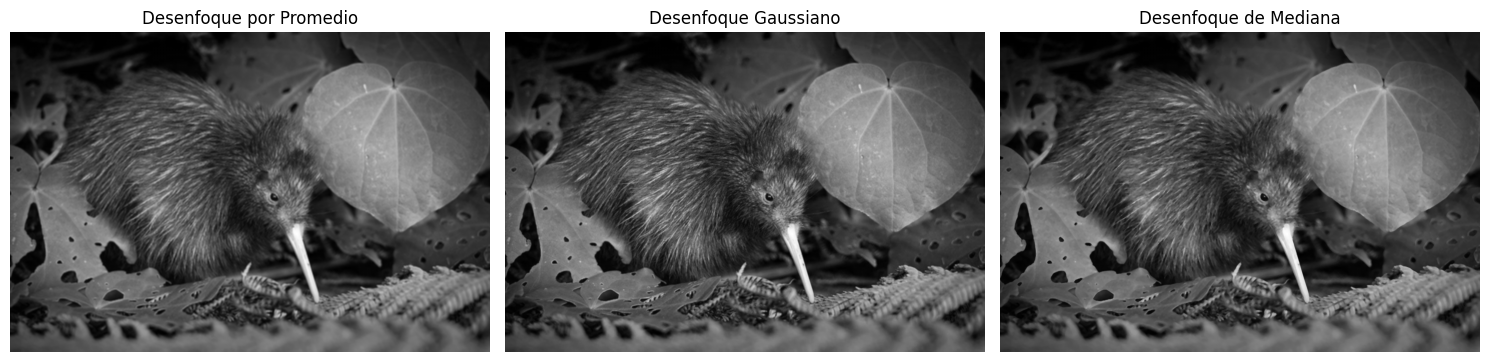

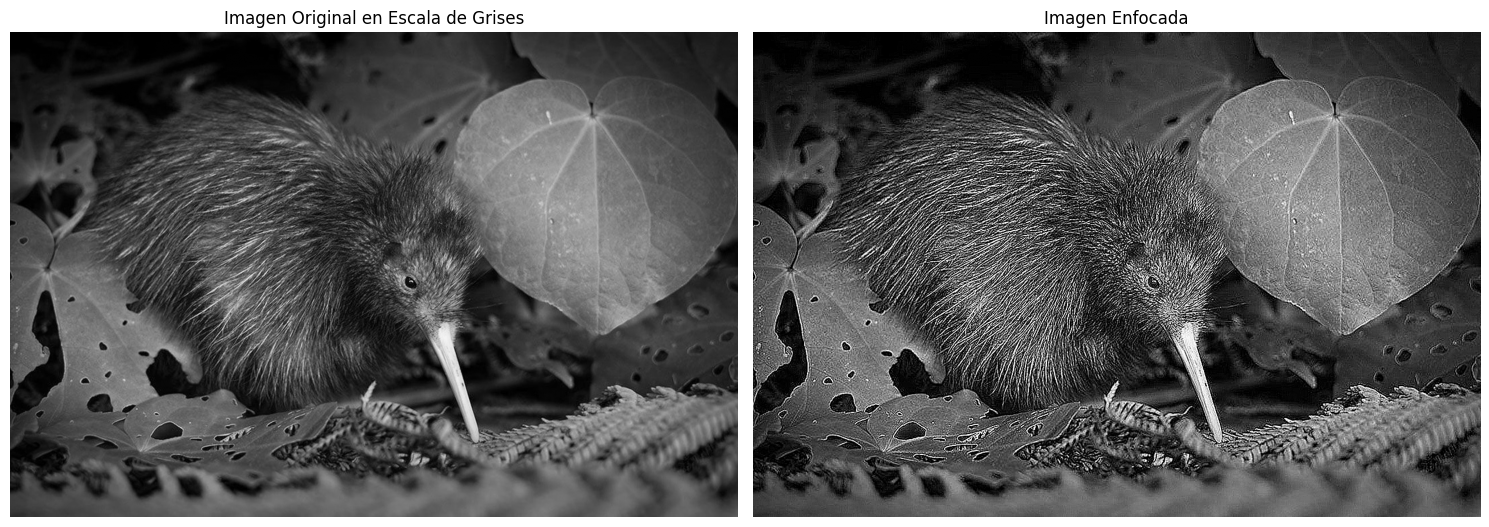

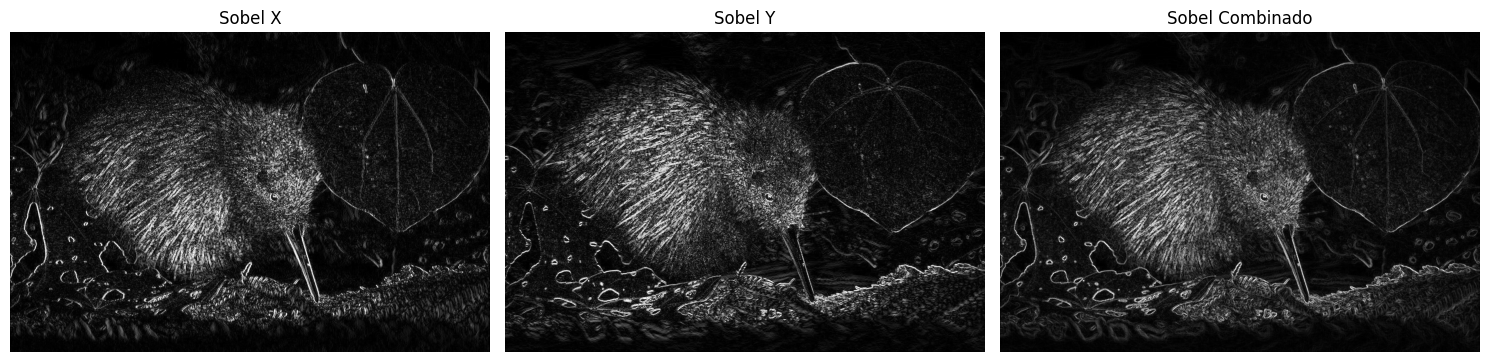

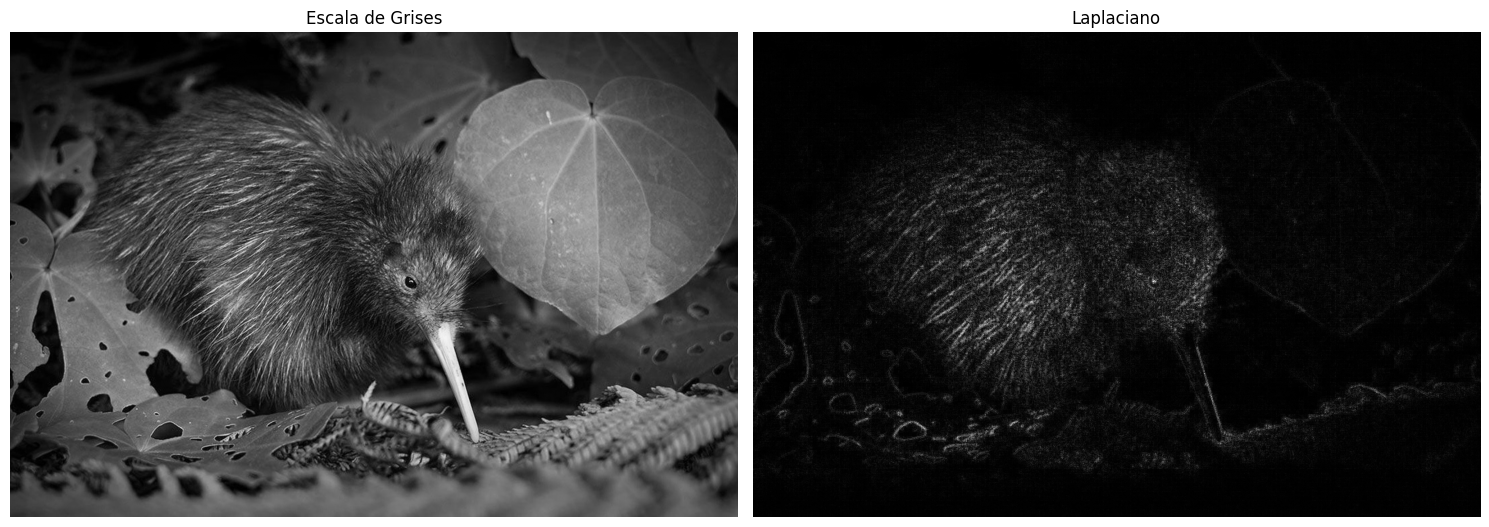

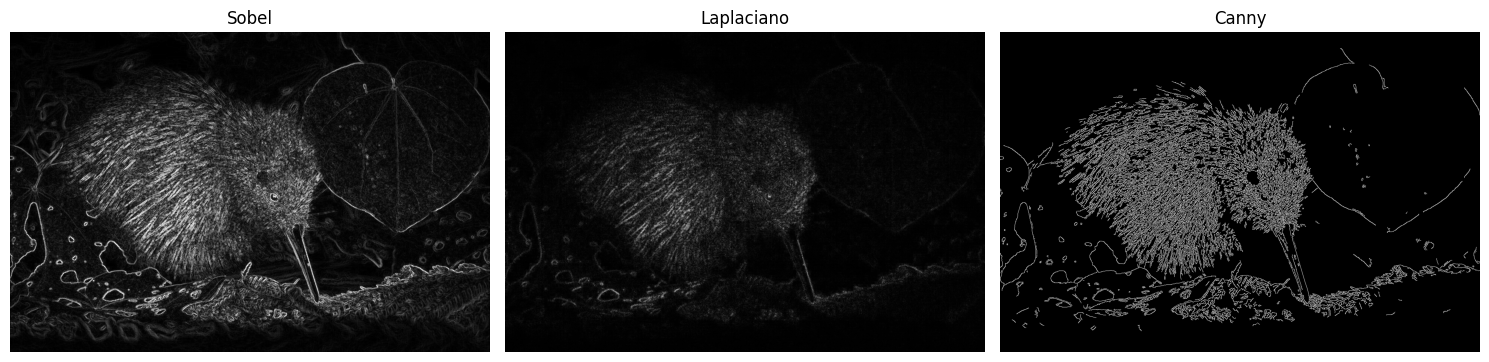

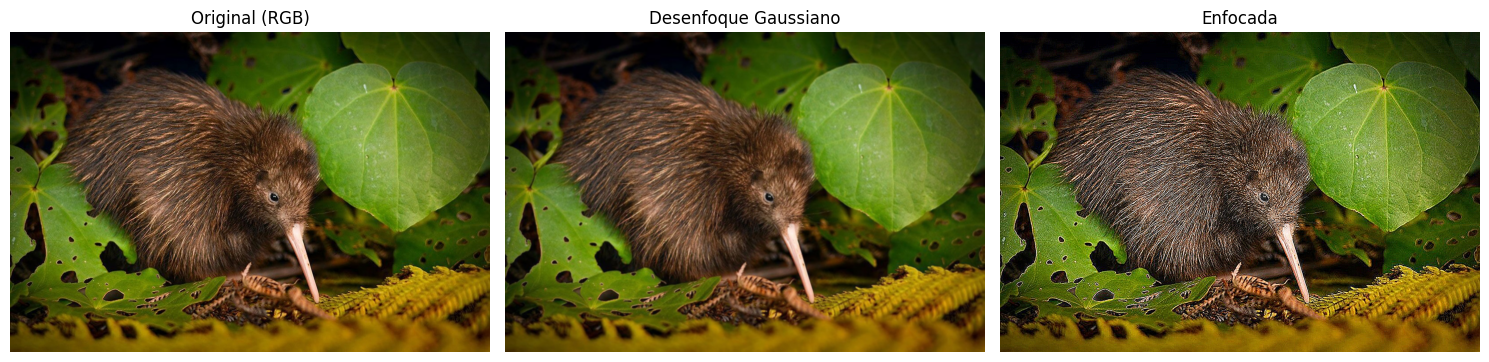

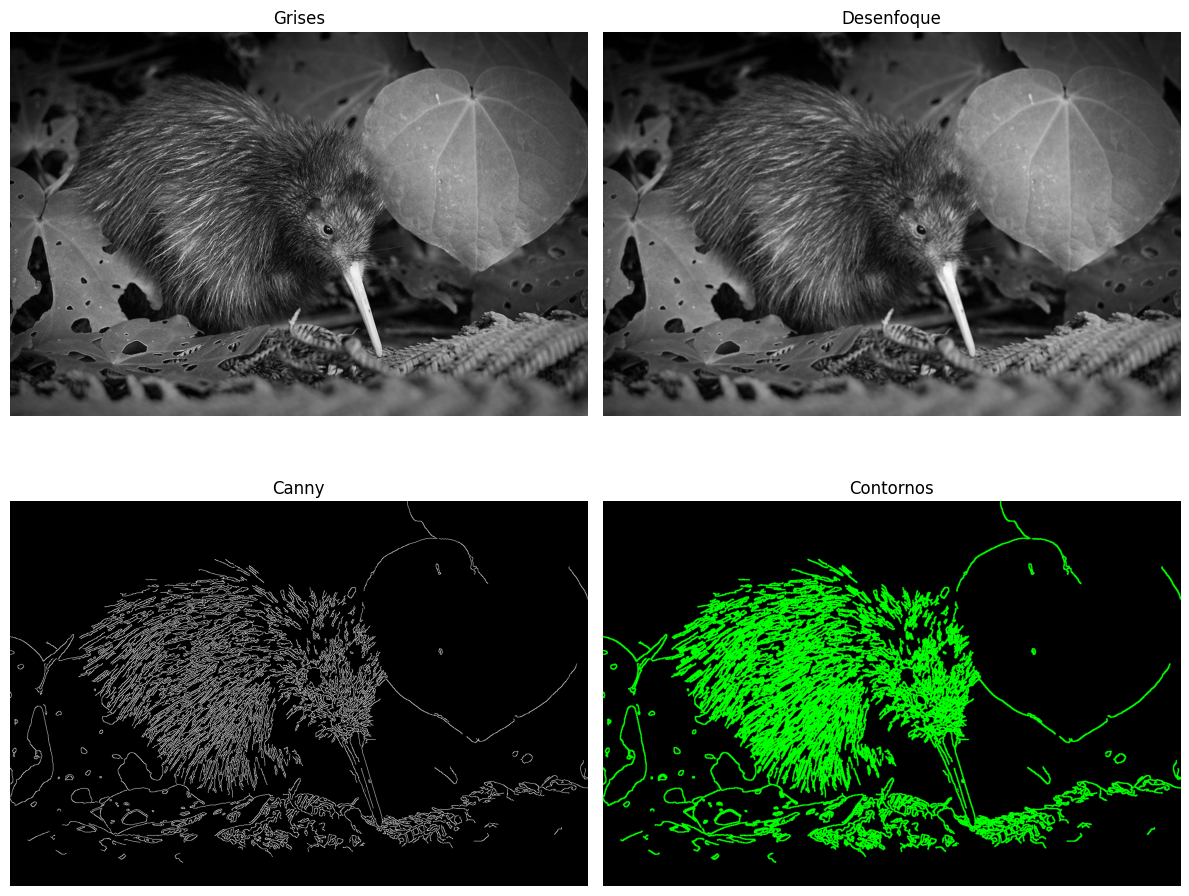

Se encontraron 934 contornos


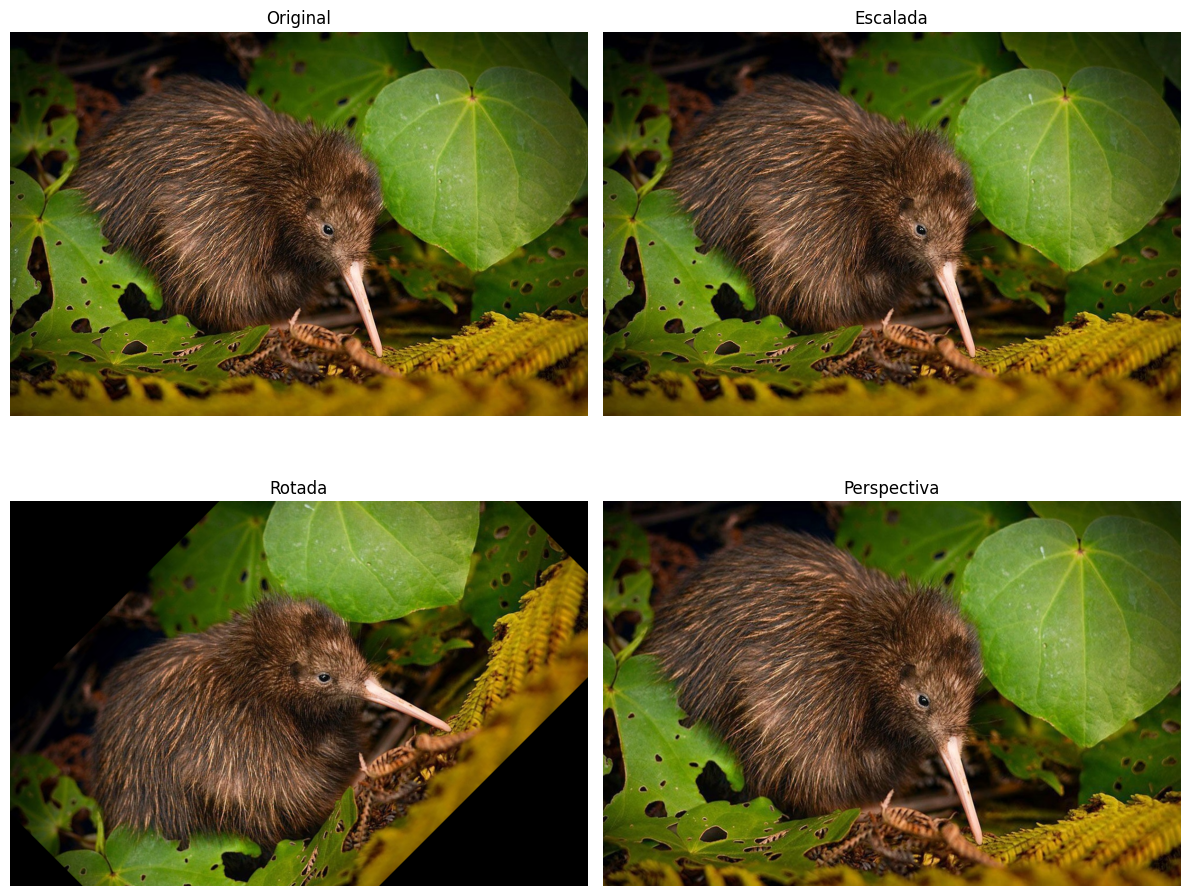

In [ ]:
# Instalamos OpenCV, matplotlib y numpy
!pip install opencv-python matplotlib numpy

# Importamos las bibliotecas necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import urllib.request

plt.figure(figsize=(15, 10))

# Descarga de imagen aqui
url = 'https://sl.sbs.com.au/public/image/file/2b12488a-5f66-4c45-909e-c4554635cea8'
url_alt = 'https://i.imgur.com/2fkykm2.jpeg'

try:
    urllib.request.urlretrieve(url, 'imagen_original.jpg')
except:
    try:
        urllib.request.urlretrieve(url_alt, 'imagen_original.jpg')
    except:
        print("Error al descargar las imágenes.")

imagen_original = cv2.imread('imagen_original.jpg')
imagen_rgb = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.imshow(imagen_rgb)
plt.title('Imagen Original (RGB)')
plt.axis('off')
plt.show()

print(f"Dimensiones de la imagen: {imagen_rgb.shape}")

# Escala de grises
imagen_gris = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8, 8))
plt.imshow(imagen_gris, cmap='gray')
plt.title('Imagen en Escala de Grises')
plt.axis('off')
plt.show()

print(f"Dimensiones de la imagen en escala de grises: {imagen_gris.shape}")

# Filtros de desenfoque
kernel_size = (5, 5)
blur_avg = cv2.blur(imagen_gris, kernel_size)
blur_gaussian = cv2.GaussianBlur(imagen_gris, kernel_size, sigmaX=0)
blur_median = cv2.medianBlur(imagen_gris, 5)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(blur_avg, cmap='gray')
axes[0].set_title('Desenfoque por Promedio')
axes[0].axis('off')
axes[1].imshow(blur_gaussian, cmap='gray')
axes[1].set_title('Desenfoque Gaussiano')
axes[1].axis('off')
axes[2].imshow(blur_median, cmap='gray')
axes[2].set_title('Desenfoque de Mediana')
axes[2].axis('off')
plt.tight_layout()
plt.show()

# Filtro de enfoque
kernel_enfoque = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
imagen_enfocada = cv2.filter2D(imagen_gris, -1, kernel_enfoque)

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].imshow(imagen_gris, cmap='gray')
axes[0].set_title('Imagen Original en Escala de Grises')
axes[0].axis('off')
axes[1].imshow(imagen_enfocada, cmap='gray')
axes[1].set_title('Imagen Enfocada')
axes[1].axis('off')
plt.tight_layout()
plt.show()

# Detección de bordes - Sobel
sobel_x = cv2.Sobel(imagen_gris, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(imagen_gris, cv2.CV_64F, 0, 1, ksize=3)
sobel_x_abs = cv2.convertScaleAbs(sobel_x)
sobel_y_abs = cv2.convertScaleAbs(sobel_y)
sobel_combinado = cv2.addWeighted(sobel_x_abs, 0.5, sobel_y_abs, 0.5, 0)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(sobel_x_abs, cmap='gray')
axes[0].set_title('Sobel X')
axes[0].axis('off')
axes[1].imshow(sobel_y_abs, cmap='gray')
axes[1].set_title('Sobel Y')
axes[1].axis('off')
axes[2].imshow(sobel_combinado, cmap='gray')
axes[2].set_title('Sobel Combinado')
axes[2].axis('off')
plt.tight_layout()
plt.show()

# Filtro Laplaciano
laplacian = cv2.Laplacian(imagen_gris, cv2.CV_64F)
laplacian_abs = cv2.convertScaleAbs(laplacian)

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].imshow(imagen_gris, cmap='gray')
axes[0].set_title('Escala de Grises')
axes[0].axis('off')
axes[1].imshow(laplacian_abs, cmap='gray')
axes[1].set_title('Laplaciano')
axes[1].axis('off')
plt.tight_layout()
plt.show()

# Comparación de bordes: Sobel, Laplaciano, Canny
canny = cv2.Canny(imagen_gris, 100, 200)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(sobel_combinado, cmap='gray')
axes[0].set_title('Sobel')
axes[0].axis('off')
axes[1].imshow(laplacian_abs, cmap='gray')
axes[1].set_title('Laplaciano')
axes[1].axis('off')
axes[2].imshow(canny, cmap='gray')
axes[2].set_title('Canny')
axes[2].axis('off')
plt.tight_layout()
plt.show()

# Filtros en imágenes a color
imagen_blur_color = cv2.GaussianBlur(imagen_rgb, (5, 5), 0)
imagen_color_enfocada = cv2.filter2D(imagen_rgb, -1, kernel_enfoque)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(imagen_rgb)
axes[0].set_title('Original (RGB)')
axes[0].axis('off')
axes[1].imshow(imagen_blur_color)
axes[1].set_title('Desenfoque Gaussiano')
axes[1].axis('off')
axes[2].imshow(imagen_color_enfocada)
axes[2].set_title('Enfocada')
axes[2].axis('off')
plt.tight_layout()
plt.show()

# Ejercicio práctico: detección de contornos
gris = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2GRAY)
gris_blur = cv2.GaussianBlur(gris, (5, 5), 0)
bordes = cv2.Canny(gris_blur, 50, 150)
kernel = np.ones((3, 3), np.uint8)
bordes_dilatados = cv2.dilate(bordes, kernel, iterations=1)
contornos, _ = cv2.findContours(bordes.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
imagen_contornos = np.zeros_like(imagen_rgb)
cv2.drawContours(imagen_contornos, contornos, -1, (0, 255, 0), 2)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].imshow(gris, cmap='gray')
axes[0, 0].set_title('Grises')
axes[0, 0].axis('off')
axes[0, 1].imshow(gris_blur, cmap='gray')
axes[0, 1].set_title('Desenfoque')
axes[0, 1].axis('off')
axes[1, 0].imshow(bordes, cmap='gray')
axes[1, 0].set_title('Canny')
axes[1, 0].axis('off')
axes[1, 1].imshow(imagen_contornos)
axes[1, 1].set_title('Contornos')
axes[1, 1].axis('off')
plt.tight_layout()
plt.show()

print(f"Se encontraron {len(contornos)} contornos")

# Transformaciones geométricas
alto, ancho = imagen_gris.shape
imagen_escalada = cv2.resize(imagen_rgb, None, fx=0.5, fy=0.5)
centro = (ancho // 2, alto // 2)
matriz_rotacion = cv2.getRotationMatrix2D(centro, 45, 1.0)
imagen_rotada = cv2.warpAffine(imagen_rgb, matriz_rotacion, (ancho, alto))

pts1 = np.float32([[50, 50], [ancho - 50, 50], [50, alto - 50], [ancho - 50, alto - 50]])
pts2 = np.float32([[0, 0], [ancho, 0], [0, alto], [ancho, alto]])
matriz_perspectiva = cv2.getPerspectiveTransform(pts1, pts2)
imagen_perspectiva = cv2.warpPerspective(imagen_rgb, matriz_perspectiva, (ancho, alto))

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].imshow(imagen_rgb)
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')
axes[0, 1].imshow(imagen_escalada)
axes[0, 1].set_title('Escalada')
axes[0, 1].axis('off')
axes[1, 0].imshow(imagen_rotada)
axes[1, 0].set_title('Rotada')
axes[1, 0].axis('off')
axes[1, 1].imshow(imagen_perspectiva)
axes[1, 1].set_title('Perspectiva')
axes[1, 1].axis('off')
plt.tight_layout()
plt.show()
